In [2]:
import numpy as np
import pandas as pd
import scipy
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

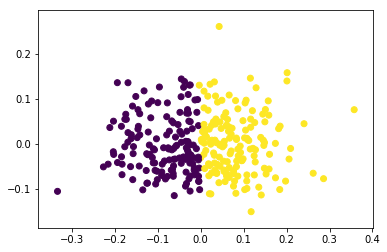

Silhouette score:  0.3910301863150037
Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [4]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print("Silhouette score: ", silhouette_score(X_pca, y_pred))
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [5]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print("Silhouette score: ", silhouette_score(X_pca, predict_mini))
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Silhouette score:  0.38981416488157455
Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      136    0
1       13  154


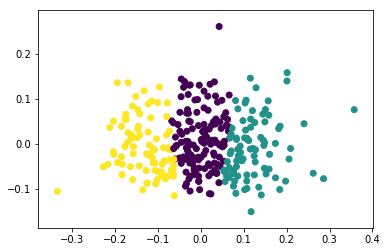

Silhouette score:  0.3155442944339677
Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33


In [6]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print("Silhouette score: ", silhouette_score(X_pca, y_pred))
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

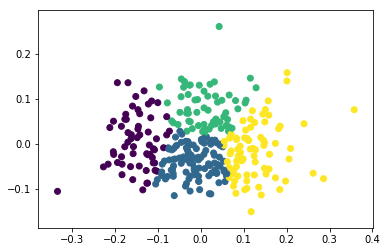

Silhouette score:  0.3480728592310558
Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56


In [7]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print("Silhouette score: ", silhouette_score(X_pca, y_pred))
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Highest Silhouette score was seen with 2 clusters and it's graph looks best among others to justify clustering.

Let's try GridSearchCV on k-means and check which hyperparameters suits our data.

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


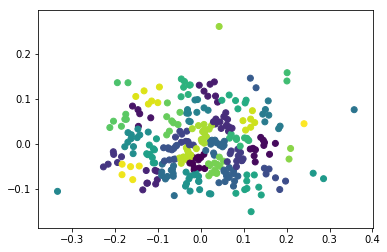

Time taken:  25.84488081932068
Best parameters:  {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 40, 'tol': 0.0001}
Shilhouette score:  0.3564885472836775
Comparing k-means clusters against the data:
col_0  0   1
row_0       
0      5   6
1      2   9
2      4   1
3      3   4
4      2   6
5      9   5
6      4   2
7      3   8
8      7   3
9      1   5
10     5   6
11     2   0
12     2  11
13     3  10
14     3   8
15     0   1
16     3   4
17     4   6
18     0   1
19     7   4
20     4  10
21     0   2
22     6   4
23     1   8
24     5   1
25     5   2
26     3   6
27     2   0
28     2   0
29     6   0
30     7   1
31     3  10
32     0   2
33     1   0
34     7   6
35     6   6
36     3   3
37     6   0
38     3   2
39     0   1


In [8]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

start = time.time()

kmeans = KMeans()

hyperparams = {
    'n_clusters': [2, 3, 4, 10, 20, 40],
    'init':['k-means++', 'random'],
    'max_iter':[100,200,300,400,500],
    'tol':[1e-6, 1e-4, 1e-2]
}

CV_kmeans = GridSearchCV(estimator=kmeans, param_grid=hyperparams, cv=5).fit(X_pca)

# Calculate predicted values.
y_pred = CV_kmeans.predict(X_pca)

end = time.time()

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print("Time taken: ", end-start)
print("Best parameters: ", CV_kmeans.best_params_)
print("Shilhouette score: ", silhouette_score(X_pca, y_pred))
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Increaing clusters decrease the silhouette score of model by 4%. Graph also doesn't look as appealing as graph with 2 clusters.

In [9]:
# Each batch will be made up of 200 data points.
start = time.time()
mbkmeans = MiniBatchKMeans()

hyperparams = {
    'n_clusters': [2, 3, 4, 10, 20, 40],
    'init':['random'],
    'max_iter':[100,200,300,400,500],
    'tol':[1e-6, 1e-4, 1e-2],
    'batch_size':[100,200, 300]
}


CV_mbkmeans = GridSearchCV(estimator=mbkmeans, param_grid=hyperparams, cv=5).fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

end = time.time()

# Check the MiniBatch model against our earlier one.
print("Time taken: ", end-start)
print("Best parameters: ", CV_mbkmeans.best_params_)
print("Silhouette score: ", silhouette_score(X_pca, predict_mini))
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Time taken:  12.591484069824219
Best parameters:  {'batch_size': 200, 'init': 'random', 'max_iter': 100, 'n_clusters': 40, 'tol': 1e-06}
Silhouette score:  0.38981416488157455
Comparing k-means and mini batch k-means solutions:
col_0  0   1   2   3   4   5   6   7   8   9   ...  30  31  32  33  34  35  \
row_0                                          ...                           
0       5   0   5   0   8   0   6   0  10   0  ...   8   0   0   0   1  11   
1       6  11   0   7   0  14   0  11   0   6  ...   0  13   2   1  12   1   

col_0  36  37  38  39  
row_0                  
0       0   6   5   0  
1       6   0   0   1  

[2 rows x 40 columns]


C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Time taken by MiniBatchKMeans is very small it also shows 3% higher silhouette score than KMeans. But for higher accuracy we should not use more clusters for such data.

**What should be my other steps to increase silhouette score for 2 clusters?**